# <center>Предсказание температуры стали</center>

**Введение**

**Предобработка данных**
+ Импорт библиотек и считывание данных
+ Целевая переменная и определение количества партий
+ Проверка на адекватность
+ Составление итогового сета

**Проверка на мультиколлинеарность**

**"Тупые" модели**

**Линейная регрессия**

**Дерево решений**

**Случайный лес**

**LightGBM**
+ Предварительные подборы
+ Финальный подбор
+ Важность факторов и удаление ненужных признаков

# <center>Введение</center>

Заказчиком проекта является металлургический комбинат; цель - построение модели, предсказывающей итоговую температуру стали на основе данных по различным этапам процесса, с MAE < 6.

# <center>Предобработка данных</center>

## <center>Импорт библиотек и считывание данных</center>

Импорт всего, что нам нужно:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#!pip install lightgbm
from lightgbm import LGBMRegressor

Cчитаем данные:

In [2]:
data_arc = pd.read_csv('data_arc.csv')
data_bulk = pd.read_csv('data_bulk.csv')
data_bulk_time = pd.read_csv('data_bulk_time.csv')
data_gas = pd.read_csv('data_gas.csv')
data_temp = pd.read_csv('data_temp.csv')
data_wire = pd.read_csv('data_wire.csv')
data_wire_time = pd.read_csv('data_wire_time.csv')

In [3]:
print(data_arc.head())
print(data_arc.info())

   key Начало нагрева дугой  Конец нагрева дугой  Активная мощность  \
0    1  2019-05-03 11:02:14  2019-05-03 11:06:02           0.976059   
1    1  2019-05-03 11:07:28  2019-05-03 11:10:33           0.805607   
2    1  2019-05-03 11:11:44  2019-05-03 11:14:36           0.744363   
3    1  2019-05-03 11:18:14  2019-05-03 11:24:19           1.659363   
4    1  2019-05-03 11:26:09  2019-05-03 11:28:37           0.692755   

   Реактивная мощность  
0             0.687084  
1             0.520285  
2             0.498805  
3             1.062669  
4             0.414397  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реак

In [4]:
print(data_bulk.head())
print(data_bulk.info())

   key  Bulk 1  Bulk 2  Bulk 3  Bulk 4  Bulk 5  Bulk 6  Bulk 7  Bulk 8  \
0    1     NaN     NaN     NaN    43.0     NaN     NaN     NaN     NaN   
1    2     NaN     NaN     NaN    73.0     NaN     NaN     NaN     NaN   
2    3     NaN     NaN     NaN    34.0     NaN     NaN     NaN     NaN   
3    4     NaN     NaN     NaN    81.0     NaN     NaN     NaN     NaN   
4    5     NaN     NaN     NaN    78.0     NaN     NaN     NaN     NaN   

   Bulk 9  Bulk 10  Bulk 11  Bulk 12  Bulk 13  Bulk 14  Bulk 15  
0     NaN      NaN      NaN    206.0      NaN    150.0    154.0  
1     NaN      NaN      NaN    206.0      NaN    149.0    154.0  
2     NaN      NaN      NaN    205.0      NaN    152.0    153.0  
3     NaN      NaN      NaN    207.0      NaN    153.0    154.0  
4     NaN      NaN      NaN    203.0      NaN    151.0    152.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   

In [5]:
print(data_bulk_time.head())
print(data_bulk_time.info())

   key Bulk 1 Bulk 2 Bulk 3               Bulk 4 Bulk 5 Bulk 6 Bulk 7 Bulk 8  \
0    1    NaN    NaN    NaN  2019-05-03 11:21:30    NaN    NaN    NaN    NaN   
1    2    NaN    NaN    NaN  2019-05-03 11:46:38    NaN    NaN    NaN    NaN   
2    3    NaN    NaN    NaN  2019-05-03 12:31:06    NaN    NaN    NaN    NaN   
3    4    NaN    NaN    NaN  2019-05-03 12:48:43    NaN    NaN    NaN    NaN   
4    5    NaN    NaN    NaN  2019-05-03 13:18:50    NaN    NaN    NaN    NaN   

  Bulk 9 Bulk 10 Bulk 11              Bulk 12 Bulk 13              Bulk 14  \
0    NaN     NaN     NaN  2019-05-03 11:03:52     NaN  2019-05-03 11:03:52   
1    NaN     NaN     NaN  2019-05-03 11:40:20     NaN  2019-05-03 11:40:20   
2    NaN     NaN     NaN  2019-05-03 12:09:40     NaN  2019-05-03 12:09:40   
3    NaN     NaN     NaN  2019-05-03 12:41:24     NaN  2019-05-03 12:41:24   
4    NaN     NaN     NaN  2019-05-03 13:12:56     NaN  2019-05-03 13:12:56   

               Bulk 15  
0  2019-05-03 11:03:52  


In [6]:
print(data_gas.head())
print(data_gas.info())

   key      Газ 1
0    1  29.749986
1    2  12.555561
2    3  28.554793
3    4  18.841219
4    5   5.413692
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB
None


In [7]:
print(data_temp.head())
print(data_temp.info())

   key         Время замера  Температура
0    1  2019-05-03 11:16:18       1571.0
1    1  2019-05-03 11:25:53       1604.0
2    1  2019-05-03 11:29:11       1618.0
3    1  2019-05-03 11:30:01       1601.0
4    1  2019-05-03 11:30:39       1613.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   Время замера  15907 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB
None


In [8]:
print(data_wire.head())
print(data_wire.info())

   key     Wire 1   Wire 2  Wire 3  Wire 4  Wire 5  Wire 6  Wire 7  Wire 8  \
0    1  60.059998      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1    2  96.052315      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2    3  91.160157      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3    4  89.063515      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4    5  89.238236  9.11456     NaN     NaN     NaN     NaN     NaN     NaN   

   Wire 9  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non

In [9]:
print(data_wire_time.head())
print(data_wire_time.info())

   key               Wire 1               Wire 2 Wire 3 Wire 4 Wire 5 Wire 6  \
0    1  2019-05-03 11:11:41                  NaN    NaN    NaN    NaN    NaN   
1    2  2019-05-03 11:46:10                  NaN    NaN    NaN    NaN    NaN   
2    3  2019-05-03 12:13:47                  NaN    NaN    NaN    NaN    NaN   
3    4  2019-05-03 12:48:05                  NaN    NaN    NaN    NaN    NaN   
4    5  2019-05-03 13:18:15  2019-05-03 13:32:06    NaN    NaN    NaN    NaN   

  Wire 7 Wire 8 Wire 9  
0    NaN    NaN    NaN  
1    NaN    NaN    NaN  
2    NaN    NaN    NaN  
3    NaN    NaN    NaN  
4    NaN    NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 

Всё считалось, но дыр множество, с типами проблемами, ничего не ясно - будем разбираться по порядку.

## <center>Целевая переменная и определение количества партий</center>

Сделаем неожиданную вещь: сначала чуть внимательнее посмотрим на **газ**:

In [10]:
print(data_gas.head())
print(data_gas.tail())

   key      Газ 1
0    1  29.749986
1    2  12.555561
2    3  28.554793
3    4  18.841219
4    5   5.413692
       key      Газ 1
3234  3237   5.543905
3235  3238   6.745669
3236  3239  16.023518
3237  3240  11.863103
3238  3241  12.680959


Последний ключ - 3241, запомним это число. И посмотрим на конец `arc`:

In [11]:
print(data_arc.tail())

        key Начало нагрева дугой  Конец нагрева дугой  Активная мощность  \
14871  3241  2019-09-01 03:58:58  2019-09-01 04:01:35           0.533670   
14872  3241  2019-09-01 04:05:04  2019-09-01 04:08:04           0.676604   
14873  3241  2019-09-01 04:16:41  2019-09-01 04:19:45           0.733899   
14874  3241  2019-09-01 04:31:51  2019-09-01 04:32:48           0.220694   
14875  3241  2019-09-01 04:34:47  2019-09-01 04:36:08           0.306580   

       Реактивная мощность  
14871             0.354439  
14872             0.523631  
14873             0.475654  
14874             0.145768  
14875             0.196708  


Ага - и здесь те же 3241. Наконец внимательнее посмотрим на температуру:

In [12]:
print(data_temp.head(30))
print(data_temp.tail(20))
print(data_temp.info())

    key         Время замера  Температура
0     1  2019-05-03 11:16:18       1571.0
1     1  2019-05-03 11:25:53       1604.0
2     1  2019-05-03 11:29:11       1618.0
3     1  2019-05-03 11:30:01       1601.0
4     1  2019-05-03 11:30:39       1613.0
5     2  2019-05-03 11:37:27       1581.0
6     2  2019-05-03 11:38:00       1577.0
7     2  2019-05-03 11:49:38       1589.0
8     2  2019-05-03 11:55:50       1604.0
9     2  2019-05-03 11:58:24       1608.0
10    2  2019-05-03 11:59:12       1602.0
11    3  2019-05-03 12:13:17       1596.0
12    3  2019-05-03 12:18:36       1597.0
13    3  2019-05-03 12:25:06       1598.0
14    3  2019-05-03 12:30:48       1599.0
15    3  2019-05-03 12:34:57       1599.0
16    4  2019-05-03 12:52:57       1601.0
17    4  2019-05-03 12:58:43       1623.0
18    4  2019-05-03 12:59:25       1625.0
19    5  2019-05-03 13:23:19       1576.0
20    5  2019-05-03 13:36:01       1602.0
21    6  2019-05-03 13:49:24       1543.0
22    6  2019-05-03 14:04:31      

Итого - мы имеем дело с 3241 партиями, для некоторых из которых отсутствует различная информация. С температурой несколько сложно.

Вызывает вопросы ситуация с партией 5: эти два значения - это первое и последнее? Или некие промежуточные, которые нам по итогу не нужны? Сделаем предположение, что первое и последнее, иначе с этим сетом просто невозможно работать. Тогда забьем дыры заглушками "-1", означающими, что данных нет, и посмотрим на все первые и последние значения:

In [13]:
data_temp['Время замера'] = pd.to_datetime(data_temp['Время замера'], format='%Y-%m-%d %H:%M:%S')
data_temp = data_temp.fillna(-1)

temp_start = pd.pivot_table(data_temp, index='key', values=['Время замера', 'Температура'], 
                            aggfunc='first')
print('Первые значения:')
print(temp_start.head(5))
print(temp_start.tail(5))
print(temp_start.info())

temp_end = pd.pivot_table(data_temp, index='key', values=['Время замера', 'Температура'], 
                            aggfunc='last')
print('***')
print('Последние значения:')
print(temp_end.head(5))
print(temp_end.tail(5))
print(temp_end.info())          

Первые значения:
           Время замера  Температура
key                                 
1   2019-05-03 11:16:18       1571.0
2   2019-05-03 11:37:27       1581.0
3   2019-05-03 12:13:17       1596.0
4   2019-05-03 12:52:57       1601.0
5   2019-05-03 13:23:19       1576.0
            Время замера  Температура
key                                  
3237 2019-08-31 22:44:04       1569.0
3238 2019-08-31 23:30:31       1584.0
3239 2019-09-01 01:31:47       1598.0
3240 2019-09-01 02:39:01       1617.0
3241 2019-09-01 04:03:30       1586.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 1 to 3241
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Время замера  3216 non-null   datetime64[ns]
 1   Температура   3216 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 75.4 KB
None
***
Последние значения:
           Время замера  Температура
key                       

И вот в чём я не вижу смысла совершенно, так это в "угадывании" целевой переменной. Да, теоретически можно было бы забить дыры средним, но это ситуация "сам придумал, потом предсказываешь", которая мне не очень нравится. Уберём все дыры и посмотрим, сколько данных останется:

In [14]:
temp_end_values = temp_end[temp_end['Температура'] > 0]

print(temp_end_values.tail())
print(temp_end_values.describe())

            Время замера  Температура
key                                  
2495 2019-08-06 00:54:42       1591.0
2496 2019-08-06 01:29:52       1591.0
2497 2019-08-06 01:53:50       1589.0
2498 2019-08-06 02:25:31       1594.0
2499 2019-08-06 03:00:28       1603.0
       Температура
count  2477.000000
mean   1595.334275
std      16.019339
min    1541.000000
25%    1587.000000
50%    1593.000000
75%    1599.000000
max    1700.000000


Вообще здесь заполнить дыры средним не так уж жмёт; однако 2400+ записей - это достаточно, и я бы сказала, что лучше работать с меньшим числом записей, но быть уверенным в целевом признаке, чем взять больший сет, но у которого четверть - это "ну скажем, что там было среднее". 

Итого - работать будем только с тем, у чего есть целевой признак. И здесь начнём подготовку к будущей проверке на адекватность - начнём создавать множество с номерами партий, которые нам **не** нужны:

In [15]:
to_delete = set()
for i in range(1, 3242):
    to_delete.add(i)
    
to_delete = to_delete.difference(temp_end_values.index)
#print(to_delete) - здесь проверка, последние элементы действительно содержатся в множестве, всё хорошо

В дальнейшем мы будем добавлять индексы в это множество и затем удалим всё, что нам по той или иной причине не нужно.

Начальную же температуру при необходимости вполне можно заполнить средним, и если потребуется, мы это сделаем - но не сейчас.

Итого у нас есть целевой признак и начальная температура. Теперь разберёмся с адекватностью.

## <center>Проверка на адекватность</center>

Измерение итоговой температуры должно быть **последним** действием, то есть дата этого измерения должна быть максимальной. Настало время сравнивать даты - начнём с нагрева дугой, где нас интересует только последний конец нагрева дугой:

In [16]:
data_arc['Конец нагрева дугой'] = pd.to_datetime(data_arc['Конец нагрева дугой'], format='%Y-%m-%d %H:%M:%S')

arc_timestamps = pd.pivot_table(data_arc, index='key', values='Конец нагрева дугой', 
                            aggfunc='last')
arc_timestamps = pd.Series(arc_timestamps['Конец нагрева дугой']).rename()
print(arc_timestamps.head())
print(arc_timestamps.tail())

key
1   2019-05-03 11:28:37
2   2019-05-03 11:53:18
3   2019-05-03 12:32:19
4   2019-05-03 12:57:50
5   2019-05-03 13:33:55
dtype: datetime64[ns]
key
3237   2019-08-31 23:03:48
3238   2019-08-31 23:41:28
3239   2019-09-01 02:15:43
3240   2019-09-01 03:34:08
3241   2019-09-01 04:36:08
dtype: datetime64[ns]


Всё хорошо, индексы не слетели. Теперь разберёмся с `bulk_time` - заполним дыры датой-заглушкой "1.1.1900":

In [17]:
data_bulk_time = data_bulk_time.fillna('1990-01-01 00:00:00')

print(data_bulk_time.head())
print(data_bulk_time.info())

   key               Bulk 1               Bulk 2               Bulk 3  \
0    1  1990-01-01 00:00:00  1990-01-01 00:00:00  1990-01-01 00:00:00   
1    2  1990-01-01 00:00:00  1990-01-01 00:00:00  1990-01-01 00:00:00   
2    3  1990-01-01 00:00:00  1990-01-01 00:00:00  1990-01-01 00:00:00   
3    4  1990-01-01 00:00:00  1990-01-01 00:00:00  1990-01-01 00:00:00   
4    5  1990-01-01 00:00:00  1990-01-01 00:00:00  1990-01-01 00:00:00   

                Bulk 4               Bulk 5               Bulk 6  \
0  2019-05-03 11:21:30  1990-01-01 00:00:00  1990-01-01 00:00:00   
1  2019-05-03 11:46:38  1990-01-01 00:00:00  1990-01-01 00:00:00   
2  2019-05-03 12:31:06  1990-01-01 00:00:00  1990-01-01 00:00:00   
3  2019-05-03 12:48:43  1990-01-01 00:00:00  1990-01-01 00:00:00   
4  2019-05-03 13:18:50  1990-01-01 00:00:00  1990-01-01 00:00:00   

                Bulk 7               Bulk 8               Bulk 9  \
0  1990-01-01 00:00:00  1990-01-01 00:00:00  1990-01-01 00:00:00   
1  1990-01-01 00

Замечательно - на всякий случай сгруппируем по ключам и переведём в дату:

In [18]:
bulk_timestamps = pd.pivot_table(data_bulk_time, index='key',
                            aggfunc='last')
bulk_timestamps = bulk_timestamps.apply(pd.to_datetime)

print(bulk_timestamps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3129 entries, 1 to 3241
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Bulk 1   3129 non-null   datetime64[ns]
 1   Bulk 10  3129 non-null   datetime64[ns]
 2   Bulk 11  3129 non-null   datetime64[ns]
 3   Bulk 12  3129 non-null   datetime64[ns]
 4   Bulk 13  3129 non-null   datetime64[ns]
 5   Bulk 14  3129 non-null   datetime64[ns]
 6   Bulk 15  3129 non-null   datetime64[ns]
 7   Bulk 2   3129 non-null   datetime64[ns]
 8   Bulk 3   3129 non-null   datetime64[ns]
 9   Bulk 4   3129 non-null   datetime64[ns]
 10  Bulk 5   3129 non-null   datetime64[ns]
 11  Bulk 6   3129 non-null   datetime64[ns]
 12  Bulk 7   3129 non-null   datetime64[ns]
 13  Bulk 8   3129 non-null   datetime64[ns]
 14  Bulk 9   3129 non-null   datetime64[ns]
dtypes: datetime64[ns](15)
memory usage: 391.1 KB
None


Наконец, возьмём максимум по строке:

In [19]:
bulk_timestamps = bulk_timestamps.max(axis=1)
print(bulk_timestamps.head())
print(bulk_timestamps.tail())

key
1   2019-05-03 11:21:30
2   2019-05-03 11:46:38
3   2019-05-03 12:31:06
4   2019-05-03 12:48:43
5   2019-05-03 13:18:50
dtype: datetime64[ns]
key
3237   2019-08-31 22:51:28
3238   2019-08-31 23:39:11
3239   2019-09-01 01:51:58
3240   2019-09-01 03:12:40
3241   2019-09-01 04:05:34
dtype: datetime64[ns]


Отлично - и теперь всё то же самое повторим для `wire_time`:

In [20]:
data_wire_time = data_wire_time.fillna('1990-01-01 00:00:00')
wire_timestamps = pd.pivot_table(data_wire_time, index='key',
                            aggfunc='last')
wire_timestamps = wire_timestamps.apply(pd.to_datetime)
wire_timestamps = wire_timestamps.max(axis=1)
print(wire_timestamps.head())
print(wire_timestamps.tail())

key
1   2019-05-03 11:11:41
2   2019-05-03 11:46:10
3   2019-05-03 12:13:47
4   2019-05-03 12:48:05
5   2019-05-03 13:32:06
dtype: datetime64[ns]
key
3237   2019-08-31 22:50:20
3238   2019-08-31 23:38:24
3239   2019-09-01 01:50:43
3240   2019-09-01 03:12:02
3241   2019-09-01 04:16:01
dtype: datetime64[ns]


А теперь добавим в множество "на удаление" все индексы, где время замера финальной температуры меньше хотя бы одного значения:

In [21]:
print(f'Длина множества до проверки: ', len(to_delete))

for i in temp_end_values.index:
    flag = 0
    try:
        temp_time = temp_end.loc[i, 'Время замера']
        arc_time = arc_timestamps[i]
        bulk_time = bulk_timestamps[i]
        wire_time = wire_timestamps[i]
        if (temp_time < arc_time 
            or temp_time < bulk_time 
            or temp_time < wire_time):
            flag = 1
    except:
        pass
    if flag == 1:
        to_delete.add(i)

print(f'Длина множества после проверки: ', len(to_delete))

Длина множества до проверки:  764
Длина множества после проверки:  887


Итого у нас вылетели ещё 123 значения - неприятно, но не катастрофа. 

## <center>Составление итогового сета</center>

Пришла пора переходить к составлению итогового сета, который будет состоять из:

**Целевой признак**:
+ конечная температура

**Признаки**:
+ начальная температура
+ газ
+ суммарная активная мощность для партии
+ суммарный bulk для партии: 15 столбцов
+ суммарный wire для партии: 9 столбцов

Целевой и начальная температура у нас уже есть. Газ тоже, но нужно посмотреть, нет ли там чего странного:

In [22]:
print(data_gas['Газ 1'].describe())

count    3239.000000
mean       11.002062
std         6.220327
min         0.008399
25%         7.043089
50%         9.836267
75%        13.769915
max        77.995040
Name: Газ 1, dtype: float64


И вообще-то есть, минимум и максимум похожи на некие аномалии. Однако аномалии - это не явная дичь в виде отрицательных величин; трогать их без понимания процесса мне боязно. Здесь оставим всё как есть, только сделаем из партий индексы:

In [23]:
gas = pd.pivot_table(data_gas, index='key', values='Газ 1', 
                            aggfunc='sum')

print(gas.head())
print(gas.tail())

         Газ 1
key           
1    29.749986
2    12.555561
3    28.554793
4    18.841219
5     5.413692
          Газ 1
key            
3237   5.543905
3238   6.745669
3239  16.023518
3240  11.863103
3241  12.680959


Разберёмся с активной мощностью, предварительно глянув, нет ли там какой дичи:

In [24]:
print(data_arc['Активная мощность'].describe())

count    14876.000000
mean         0.670441
std          0.408159
min          0.030002
25%          0.395297
50%          0.555517
75%          0.857034
max          3.731596
Name: Активная мощность, dtype: float64


Здесь снова видны странноватые значения, но не откровенная дичь - не трогаем, суммируем:

In [25]:
power = pd.pivot_table(data_arc, index='key', values='Активная мощность', 
                            aggfunc='sum')
print(power.head())
print(power.tail())
print(power.info())

     Активная мощность
key                   
1             4.878147
2             3.052598
3             2.525882
4             3.209250
5             3.347173
      Активная мощность
key                    
3237           3.932467
3238           2.106529
3239           4.666754
3240           2.984083
3241           2.471447
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 1 to 3241
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Активная мощность  3214 non-null   float64
dtypes: float64(1)
memory usage: 50.2 KB
None


Разобрались :) В `bulk` и `wire` логика следующая: если значений нет, то в котёл ничего не добавляли, то есть это 0 - заполняем пропуски нулями и суммируем:

In [26]:
bulk = data_bulk.fillna(0)
bulk = pd.pivot_table(bulk, index='key',
                            aggfunc='sum')
print(bulk.head())
print(bulk.tail())
print(bulk.info())

     Bulk 1  Bulk 10  Bulk 11  Bulk 12  Bulk 13  Bulk 14  Bulk 15  Bulk 2  \
key                                                                         
1       0.0      0.0      0.0    206.0      0.0    150.0    154.0     0.0   
2       0.0      0.0      0.0    206.0      0.0    149.0    154.0     0.0   
3       0.0      0.0      0.0    205.0      0.0    152.0    153.0     0.0   
4       0.0      0.0      0.0    207.0      0.0    153.0    154.0     0.0   
5       0.0      0.0      0.0    203.0      0.0    151.0    152.0     0.0   

     Bulk 3  Bulk 4  Bulk 5  Bulk 6  Bulk 7  Bulk 8  Bulk 9  
key                                                          
1       0.0    43.0     0.0     0.0     0.0     0.0     0.0  
2       0.0    73.0     0.0     0.0     0.0     0.0     0.0  
3       0.0    34.0     0.0     0.0     0.0     0.0     0.0  
4       0.0    81.0     0.0     0.0     0.0     0.0     0.0  
5       0.0    78.0     0.0     0.0     0.0     0.0     0.0  
      Bulk 1  Bulk 10  Bul

In [27]:
wire = data_wire.fillna(0)
wire = pd.pivot_table(wire, index='key',
                            aggfunc='sum')
print(wire.head())
print(wire.tail())
print(wire.info())

        Wire 1   Wire 2  Wire 3  Wire 4  Wire 5  Wire 6  Wire 7  Wire 8  \
key                                                                       
1    60.059998  0.00000     0.0     0.0     0.0     0.0     0.0     0.0   
2    96.052315  0.00000     0.0     0.0     0.0     0.0     0.0     0.0   
3    91.160157  0.00000     0.0     0.0     0.0     0.0     0.0     0.0   
4    89.063515  0.00000     0.0     0.0     0.0     0.0     0.0     0.0   
5    89.238236  9.11456     0.0     0.0     0.0     0.0     0.0     0.0   

     Wire 9  
key          
1       0.0  
2       0.0  
3       0.0  
4       0.0  
5       0.0  
          Wire 1  Wire 2  Wire 3  Wire 4  Wire 5  Wire 6  Wire 7  Wire 8  \
key                                                                        
3237   38.088959     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3238   56.128799     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3239  143.357761     0.0     0.0     0.0     0.0     0.0     0.0     0.0

А теперь сливаем всё воедино по индексам `key`, начиная с целевого признака, то есть конечной температуры:

In [28]:
temp_end_values = temp_end_values.drop(['Время замера'], axis=1).rename({'Температура':'temp_final'}, axis=1)
temp_start = temp_start.drop(['Время замера'], axis=1).rename({'Температура':'temp_start'}, axis=1)

data_final = temp_end_values.join(temp_start, on='key', how='left')
data_final = data_final.join(gas, on='key', how='left').rename({'Газ 1':'gas'}, axis=1)
data_final = data_final.join(power, on='key', how='left').rename({'Активная мощность':'power'}, axis=1)
data_final = data_final.join(bulk, on='key', how='left')
data_final = data_final.join(wire, on='key', how='left')

print(data_final.head())
print(data_final.tail())
print(data_final.info())

     temp_final  temp_start        gas     power  Bulk 1  Bulk 10  Bulk 11  \
key                                                                          
1        1613.0      1571.0  29.749986  4.878147     0.0      0.0      0.0   
2        1602.0      1581.0  12.555561  3.052598     0.0      0.0      0.0   
3        1599.0      1596.0  28.554793  2.525882     0.0      0.0      0.0   
4        1625.0      1601.0  18.841219  3.209250     0.0      0.0      0.0   
5        1602.0      1576.0   5.413692  3.347173     0.0      0.0      0.0   

     Bulk 12  Bulk 13  Bulk 14  ...  Bulk 9     Wire 1   Wire 2  Wire 3  \
key                             ...                                       
1      206.0      0.0    150.0  ...     0.0  60.059998  0.00000     0.0   
2      206.0      0.0    149.0  ...     0.0  96.052315  0.00000     0.0   
3      205.0      0.0    152.0  ...     0.0  91.160157  0.00000     0.0   
4      207.0      0.0    153.0  ...     0.0  89.063515  0.00000     0.0   
5  

У нас образовались дыры - это ожидаемо. Прежде чем чем-то их заполнять, вспомним о нашем множестве "на удаление" - и удалим все индексы оттуда:

In [29]:
for i in data_final.index:
    if i in to_delete:
        data_final = data_final.drop(i)
        
print(data_final.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 1 to 2499
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp_final  2354 non-null   float64
 1   temp_start  2354 non-null   float64
 2   gas         2352 non-null   float64
 3   power       2352 non-null   float64
 4   Bulk 1      2285 non-null   float64
 5   Bulk 10     2285 non-null   float64
 6   Bulk 11     2285 non-null   float64
 7   Bulk 12     2285 non-null   float64
 8   Bulk 13     2285 non-null   float64
 9   Bulk 14     2285 non-null   float64
 10  Bulk 15     2285 non-null   float64
 11  Bulk 2      2285 non-null   float64
 12  Bulk 3      2285 non-null   float64
 13  Bulk 4      2285 non-null   float64
 14  Bulk 5      2285 non-null   float64
 15  Bulk 6      2285 non-null   float64
 16  Bulk 7      2285 non-null   float64
 17  Bulk 8      2285 non-null   float64
 18  Bulk 9      2285 non-null   float64
 19  Wire 1      2250 non-null  

Замечательно - `gas` и `power` можно заполнить средними. Для `bulk` и `wire` я принимаю волевое решение вставить нули - это кажется более логичным.

И вообще-то, как я понимаю, **вот здесь**, перед итоговым заполнением пропусков, следовало бы разделить сет на обучающую+валидационную и тестовые выборки и заполнять средними только по обучающей+валидационной. Но. С `bulk` и `wire` стратегия всегда проста: если пропуск - то ноль. А пропусков в `gas` и `power` у нас всего два. Два.
Думаю, что если я заполню эти несчастные два пропуска данными по всему сету и впоследствии на вход - если в данных пропуск - пойдёт среднее по всему этому сету, то никакой беды не случится. Этот конкретный сет можно заполнить целиком и делить уже потом:

In [30]:
for col in data_final.columns:
    if (col == 'gas' or col == 'power'):
        data_final[col] = data_final[col].fillna(data_final[col].mean())
    else:
        data_final[col] = data_final[col].fillna(0)
    
print(data_final.head())    
print(data_final.info())

     temp_final  temp_start        gas     power  Bulk 1  Bulk 10  Bulk 11  \
key                                                                          
1        1613.0      1571.0  29.749986  4.878147     0.0      0.0      0.0   
2        1602.0      1581.0  12.555561  3.052598     0.0      0.0      0.0   
3        1599.0      1596.0  28.554793  2.525882     0.0      0.0      0.0   
4        1625.0      1601.0  18.841219  3.209250     0.0      0.0      0.0   
5        1602.0      1576.0   5.413692  3.347173     0.0      0.0      0.0   

     Bulk 12  Bulk 13  Bulk 14  ...  Bulk 9     Wire 1   Wire 2  Wire 3  \
key                             ...                                       
1      206.0      0.0    150.0  ...     0.0  60.059998  0.00000     0.0   
2      206.0      0.0    149.0  ...     0.0  96.052315  0.00000     0.0   
3      205.0      0.0    152.0  ...     0.0  91.160157  0.00000     0.0   
4      207.0      0.0    153.0  ...     0.0  89.063515  0.00000     0.0   
5  

К - Красота. Да, датасет громоздкий, причём очень много значений в нём нули - однако именно он, на мой взгляд, аккуратнее всего отражает процесс: сливать все `bulk` и `wire` во что-то одно я не хочу, потому что не вижу в том физического смысла.

# <center>Проверка на мультиколлинеарность</center>

Проверим сет на мультиколлинеарность (граница - 0.8):

In [31]:
correlation = data_final.corr()

for i in correlation.index:
    for col in correlation.columns:
        if (correlation.loc[i, col] > 0.8) and i != col:
            print(i, col)

Bulk 9 Wire 8
Wire 8 Bulk 9


И вот почему это и **только** это - бог весть. Пусть разбираются те, кто разбирается - а мы просто уберём `Wire 8`:

In [32]:
data_final = data_final.drop(['Wire 8'], axis=1)

# <center>"Тупые" модели</center>

Посмотрим, какое MAE выдают просто "среднее" и "медиана". Заодно отделим здесь тестовую выборку, которую в дальнейшем не будем трогать и будем использовать только для теста:

In [33]:
target = data_final['temp_final']
features = data_final.drop(['temp_final'], axis=1)

features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                            test_size=0.2, random_state=42)

model = DummyRegressor(strategy='mean')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
dummy_mae_test = mean_absolute_error(target_test, predicted_test)
print(f'Среднее:', dummy_mae_test)

Среднее: 10.273302416413246


In [34]:
model = DummyRegressor(strategy='median')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
dummy_mae_test = mean_absolute_error(target_test, predicted_test)
print(f'Медиана:', dummy_mae_test)

Медиана: 10.099787685774947


Результат ожидаемо "сравнительно низкий в вакууме", потому что целевая переменная колеблется в малом диапазоне. Что ж - попробуем получить MAE < 6 :)

# <center>Линейная регрессия</center>

Начнём с простого и надёжного:

In [35]:
preprocessor = StandardScaler()
lr_pipeline = make_pipeline(preprocessor, LinearRegression())

In [36]:
%%time
lr_pipeline.fit(features_train, target_train)

Wall time: 3.24 s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [37]:
%%time
predicted_test = lr_pipeline.predict(features_test)

Wall time: 2.99 ms


In [38]:
lr_mae_test = mean_absolute_error(target_test, predicted_test)
print(lr_mae_test)

7.943777071370562


Увы - в данном случае линейная регрессия справляется быстро, но очень плохо. Отставим её, попробуем дерево: 

# <center>Дерево решений</center>

Здесь и далее везде осуществляется поиск по сетке с 5-фолдовой кроссвалидацией:

In [39]:
tree_pipeline = Pipeline(steps=[('prep', preprocessor), 
                                ('est', DecisionTreeRegressor(random_state=42))])
tree_param = {'est__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

gs_tree = GridSearchCV(tree_pipeline,
                      param_grid=tree_param,
                      scoring=make_scorer(mean_absolute_error, greater_is_better=False),
                      cv=5, verbose=0)
gs_tree.fit(features_train, target_train)

print(gs_tree.best_score_)
print(gs_tree.best_params_)

-7.136179983808522
{'est__max_depth': 8}


In [40]:
tree_pipeline = Pipeline(steps=[('prep', preprocessor), 
                                ('est', DecisionTreeRegressor(random_state=42, max_depth=8))])

In [41]:
%%time
tree_pipeline.fit(features_train, target_train)

Wall time: 14.9 ms


Pipeline(steps=[('prep', StandardScaler()),
                ('est', DecisionTreeRegressor(max_depth=8, random_state=42))])

In [42]:
%%time
predicted_test = tree_pipeline.predict(features_test)

Wall time: 2.99 ms


In [43]:
tree_mae_test = mean_absolute_error(target_test, predicted_test)
print(tree_mae_test)

7.84928322358186


Результат едва лучше линейной регрессии, что не обнадёживает. Пробовать здесь что-то сделать смысла мало, переходим к лесу:

# <center>Случайный лес</center>

Первичный прогон:

In [44]:
#rf_pipeline = Pipeline(steps=[('prep', preprocessor), 
#                                ('est', RandomForestRegressor(random_state=42))])
#rf_param = [{'est__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
#             'est__n_estimators': [20, 40, 60, 80, 100]}]

#gs_rf = GridSearchCV(rf_pipeline,
#                      param_grid=rf_param,
#                      scoring=make_scorer(mean_absolute_error, greater_is_better=False),
#                      cv=5, verbose=0)
#gs_rf.fit(features_train, target_train)

#print(gs_rf.best_score_)
#print(gs_rf.best_params_)

Результат: `-6.188543593529425
{'est__max_depth': 10, 'est__n_estimators': 60}`. Пробуем взять большую глубину:

In [45]:
#rf_pipeline = Pipeline(steps=[('prep', preprocessor), 
#                                ('est', RandomForestRegressor(random_state=42))])
#rf_param = [{'est__max_depth': [9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
#             'est__n_estimators': [40, 50, 60, 70, 80]}]

#gs_rf = GridSearchCV(rf_pipeline,
#                      param_grid=rf_param,
#                      scoring=make_scorer(mean_absolute_error, greater_is_better=False),
#                      cv=5, verbose=0)
#gs_rf.fit(features_train, target_train)

#print(gs_rf.best_score_)
#print(gs_rf.best_params_)

Результат: `-6.185214447724029
{'est__max_depth': 10, 'est__n_estimators': 70}`. Обнадёживающе - смотрим тест:

In [46]:
rf_pipeline = Pipeline(steps=[('prep', preprocessor), 
                                ('est', RandomForestRegressor(random_state=42, 
                                                              max_depth=10, 
                                                              n_estimators=70))])

In [47]:
%%time
rf_pipeline.fit(features_train, target_train)

Wall time: 666 ms


Pipeline(steps=[('prep', StandardScaler()),
                ('est',
                 RandomForestRegressor(max_depth=10, n_estimators=70,
                                       random_state=42))])

In [48]:
%%time
predicted_test = rf_pipeline.predict(features_test)

Wall time: 12 ms


In [49]:
rf_mae_test = mean_absolute_error(target_test, predicted_test)
print(rf_mae_test)

6.316984530623588


Кто-то несколько переобучился, но результат обнадёживает - пытаться подбирать параметры леса смысл есть. Что не обнадёживает, так это время обучения - как показывает опыт, градиентный бустинг LightGBM может справиться и быстрее, и лучше, переходим к нему.

# <center>LightGBM</center>

## <center>Предварительные подборы</center>

Первичный прогон:

In [50]:
#lgbm_pipeline = Pipeline(steps=[('prep', preprocessor), 
#                                ('est', LGBMRegressor(random_state=42))])

#lgbm_params = [{'est__max_depth': [5, 6, 7, 8, 9, 10],
#           'est__n_estimators': [50, 100, 150, 200], 
#           'est__learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
#           'est__boosting_type': ['gbdt', 'dart']}]

#gs_boost = GridSearchCV(lgbm_pipeline,
#                      param_grid=lgbm_params,
#                      scoring=make_scorer(mean_absolute_error, greater_is_better=False),
#                      cv=5, verbose=0)
#gs_boost.fit(features_train, target_train)

#print(gs_boost.best_score_)
#print(gs_boost.best_params_)

Результат: `-6.196174592328298
{'est__boosting_type': 'gbdt', 'est__learning_rate': 0.05, 'est__max_depth': 6, 'est__n_estimators': 150}`. Останавливаемся на `gbdt`, смотрим аккуратнее:

In [51]:
#lgbm_pipeline = Pipeline(steps=[('prep', preprocessor), 
#                                ('est', LGBMRegressor(random_state=42, boosting_type='gbdt'))])

#lgbm_params = [{'est__max_depth': [5, 6, 7, 8, 9, 10],
#           'est__n_estimators': [110, 130, 150, 170, 190], 
#           'est__learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],
#           'est__reg_lambda': [0.0, 0.1, 0.15, 0.2, 0.25, 0.3]}]

#gs_boost = GridSearchCV(lgbm_pipeline,
#                      param_grid=lgbm_params,
#                      scoring=make_scorer(mean_absolute_error, greater_is_better=False),
#                      cv=5, verbose=0)
#gs_boost.fit(features_train, target_train)

#print(gs_boost.best_score_)
#print(gs_boost.best_params_)

Результат: `-6.172433183839788
{'est__learning_rate': 0.04, 'est__max_depth': 5, 'est__n_estimators': 170, 'est__reg_lambda': 0.25}`. Здесь посмотрим, что покажет тест:

In [52]:
lgbm_pipeline = Pipeline(steps=[('prep', preprocessor), 
                                ('est', LGBMRegressor(random_state=42,
                                                     boosting_type='gbdt', learning_rate=0.04,
                                                     max_depth=5, n_estimators=170, reg_lambda=0.25))])                                                          

In [53]:
%%time
lgbm_pipeline.fit(features_train, target_train)

Wall time: 806 ms


Pipeline(steps=[('prep', StandardScaler()),
                ('est',
                 LGBMRegressor(learning_rate=0.04, max_depth=5,
                               n_estimators=170, random_state=42,
                               reg_lambda=0.25))])

In [54]:
%%time
predicted_test = lgbm_pipeline.predict(features_test)

Wall time: 3.99 ms


In [55]:
predicted_train = lgbm_pipeline.predict(features_train)
lgbm_mae_train = mean_absolute_error(target_train, predicted_train)
print(f'Обучающая:', lgbm_mae_train)
lgbm_mae_test = mean_absolute_error(target_test, predicted_test)
print(f'Тестовая:', lgbm_mae_test)

Обучающая: 4.846957194800644
Тестовая: 6.168410242651911


Тест показывает примерно тот же результат, то есть модель не переобучается - это очень обнадёживает, смотрим дальше:

In [56]:
#lgbm_pipeline = Pipeline(steps=[('prep', preprocessor), 
#                                ('est', LGBMRegressor(random_state=42, boosting_type='gbdt'))])

#lgbm_params = [{'est__max_depth': [5, 6, 7, 8],
#                'est__n_estimators': [150, 170, 190],
#                'est__learning_rate': [0.03, 0.04, 0.05],
#                'est__reg_lambda': [0.15, 0.2, 0.25, 0.3],
#                'est__min_child_samples': [10, 15, 20, 25, 30]}]

#gs_boost = GridSearchCV(lgbm_pipeline,
#                      param_grid=lgbm_params,
#                      scoring=make_scorer(mean_absolute_error, greater_is_better=False),
#                      cv=5, verbose=0)
#gs_boost.fit(features_train, target_train)

#print(gs_boost.best_score_)
#print(gs_boost.best_params_)

Результат: `-6.109172802940002
{'est__learning_rate': 0.03, 'est__max_depth': 5, 'est__min_child_samples': 10, 'est__n_estimators': 190, 'est__reg_lambda': 0.25}`. Тест:

In [57]:
lgbm_pipeline = Pipeline(steps=[('prep', preprocessor), 
                                ('est', LGBMRegressor(random_state=42,
                                                     boosting_type='gbdt', learning_rate=0.03,
                                                     max_depth=5, n_estimators=190, reg_lambda=0.25,
                                                      min_child_samples=10))]) 

In [58]:
%%time
lgbm_pipeline.fit(features_train, target_train)

Wall time: 135 ms


Pipeline(steps=[('prep', StandardScaler()),
                ('est',
                 LGBMRegressor(learning_rate=0.03, max_depth=5,
                               min_child_samples=10, n_estimators=190,
                               random_state=42, reg_lambda=0.25))])

In [59]:
%%time
predicted_test = lgbm_pipeline.predict(features_test)

Wall time: 66.8 ms


In [60]:
predicted_train = lgbm_pipeline.predict(features_train)
lgbm_mae_train = mean_absolute_error(target_train, predicted_train)
print(f'Обучающая:', lgbm_mae_train)
lgbm_mae_test = mean_absolute_error(target_test, predicted_test)
print(f'Тестовая:', lgbm_mae_test)

Обучающая: 4.634594027833056
Тестовая: 6.181212167515315


И вот тут результат не обрадовал - видимо, модель переобучилась. Но дальнейшие попытки показали, что смысл ковырять в этом направлении есть:

In [61]:
#lgbm_pipeline = Pipeline(steps=[('prep', preprocessor), 
#                                ('est', LGBMRegressor(random_state=42, boosting_type='gbdt'))])

#lgbm_params = [{'est__max_depth': [3, 4, 5, 6, 7],
#                'est__n_estimators': [150, 170, 190],
#                'est__learning_rate': [0.03, 0.04, 0.05],
#                'est__reg_lambda': [0.15, 0.2, 0.25, 0.3],
#                'est__min_child_samples': [6, 8, 10, 12]}]

#gs_boost = GridSearchCV(lgbm_pipeline,
#                      param_grid=lgbm_params,
#                      scoring=make_scorer(mean_absolute_error, greater_is_better=False),
#                      cv=5, verbose=0)
#gs_boost.fit(features_train, target_train)

#print(gs_boost.best_score_)
#print(gs_boost.best_params_)

Результат: `-6.053264815308516
{'est__learning_rate': 0.03, 'est__max_depth': 5, 'est__min_child_samples': 6, 'est__n_estimators': 190, 'est__reg_lambda': 0.2}`. Тест:

In [62]:
lgbm_pipeline = Pipeline(steps=[('prep', preprocessor), 
                                ('est', LGBMRegressor(random_state=42,
                                                     boosting_type='gbdt', learning_rate=0.03,
                                                     max_depth=5, n_estimators=190, reg_lambda=0.25,
                                                      min_child_samples=6))]) 

In [63]:
%%time
lgbm_pipeline.fit(features_train, target_train)

Wall time: 530 ms


Pipeline(steps=[('prep', StandardScaler()),
                ('est',
                 LGBMRegressor(learning_rate=0.03, max_depth=5,
                               min_child_samples=6, n_estimators=190,
                               random_state=42, reg_lambda=0.25))])

In [64]:
%%time
predicted_test = lgbm_pipeline.predict(features_test)

Wall time: 6.98 ms


In [65]:
predicted_train = lgbm_pipeline.predict(features_train)
lgbm_mae_train = mean_absolute_error(target_train, predicted_train)
print(f'Обучающая:', lgbm_mae_train)
lgbm_mae_test = mean_absolute_error(target_test, predicted_test)
print(f'Тестовая:', lgbm_mae_test)

Обучающая: 4.449740927837809
Тестовая: 6.111096049115308


Лучше становится - и дальше тоже становилось лучше:

In [66]:
#lgbm_pipeline = Pipeline(steps=[('prep', preprocessor), 
#                                ('est', LGBMRegressor(random_state=42, boosting_type='gbdt'))])

#lgbm_params = [{'est__max_depth': [3, 4, 5, 6, 7],
#                'est__n_estimators': [150, 170, 190],
#                'est__learning_rate': [0.03, 0.04, 0.05],
#                'est__reg_lambda': [0.15, 0.2, 0.25, 0.3],
#                'est__min_child_samples': [1, 2, 3, 4, 5]}]

#gs_boost = GridSearchCV(lgbm_pipeline,
#                      param_grid=lgbm_params,
#                      scoring=make_scorer(mean_absolute_error, greater_is_better=False),
#                      cv=5, verbose=0)
#gs_boost.fit(features_train, target_train)

#print(gs_boost.best_score_)
#print(gs_boost.best_params_)

`-6.02793794081695
{'est__learning_rate': 0.05, 'est__max_depth': 5, 'est__min_child_samples': 2, 'est__n_estimators': 170, 'est__reg_lambda': 0.3}`

In [67]:
lgbm_pipeline = Pipeline(steps=[('prep', preprocessor), 
                                ('est', LGBMRegressor(random_state=42,
                                                     boosting_type='gbdt', learning_rate=0.05,
                                                     max_depth=5, n_estimators=170, reg_lambda=0.3,
                                                      min_child_samples=2))]) 

In [68]:
%%time
lgbm_pipeline.fit(features_train, target_train)

Wall time: 155 ms


Pipeline(steps=[('prep', StandardScaler()),
                ('est',
                 LGBMRegressor(learning_rate=0.05, max_depth=5,
                               min_child_samples=2, n_estimators=170,
                               random_state=42, reg_lambda=0.3))])

In [69]:
%%time
predicted_test = lgbm_pipeline.predict(features_test)

Wall time: 3.99 ms


In [70]:
predicted_train = lgbm_pipeline.predict(features_train)
lgbm_mae_train = mean_absolute_error(target_train, predicted_train)
print(f'Обучающая:', lgbm_mae_train)
lgbm_mae_test = mean_absolute_error(target_test, predicted_test)
print(f'Тестовая:', lgbm_mae_test)

Обучающая: 3.872843180562522
Тестовая: 6.059333236562937


## <center>Финальный подбор</center>

В итоге финальный подбор выглядит вот так:

In [71]:
#lgbm_pipeline = Pipeline(steps=[('prep', preprocessor), 
#                                ('est', LGBMRegressor(random_state=42, boosting_type='gbdt'))])

#lgbm_params = [{'est__max_depth': [3, 4, 5, 6, 7],
#                'est__n_estimators': [150, 160, 170, 180, 190],
#                'est__learning_rate': [0.04, 0.045, 0.05, 0.055, 0.06],
#                'est__reg_lambda': [0.2, 0.25, 0.3, 0.35, 0.4],
#                'est__min_child_samples': [2, 3, 4],
#                'est__num_leaves': [18, 19, 20, 21, 22]}]

#gs_boost = GridSearchCV(lgbm_pipeline,
#                      param_grid=lgbm_params,
#                      scoring=make_scorer(mean_absolute_error, greater_is_better=False),
#                      cv=5, verbose=0)
#gs_boost.fit(features_train, target_train)

#print(gs_boost.best_score_)
#print(gs_boost.best_params_)

Результат: `-5.982357756440104
{'est__learning_rate': 0.045, 'est__max_depth': 6, 'est__min_child_samples': 2, 'est__n_estimators': 160, 'est__num_leaves': 19, 'est__reg_lambda': 0.35}`. Всё, кроме `min_child_samples`, лежит между границами - уменьшать же `min_child_samples` до 1 не кажется мне осмысленным. Тест:

In [72]:
lgbm_pipeline = Pipeline(steps=[('prep', preprocessor), 
                                ('est', LGBMRegressor(random_state=42,
                                                     boosting_type='gbdt', learning_rate=0.045,
                                                     max_depth=6, n_estimators=160, reg_lambda=0.35,
                                                      min_child_samples=2, num_leaves=19))]) 

In [73]:
%%time
lgbm_pipeline.fit(features_train, target_train)

Wall time: 177 ms


Pipeline(steps=[('prep', StandardScaler()),
                ('est',
                 LGBMRegressor(learning_rate=0.045, max_depth=6,
                               min_child_samples=2, n_estimators=160,
                               num_leaves=19, random_state=42,
                               reg_lambda=0.35))])

In [74]:
%%time
predicted_test = lgbm_pipeline.predict(features_test)

Wall time: 7.98 ms


In [75]:
predicted_train = lgbm_pipeline.predict(features_train)
lgbm_mae_train = mean_absolute_error(target_train, predicted_train)
print(f'Обучающая:', lgbm_mae_train)
lgbm_mae_test = mean_absolute_error(target_test, predicted_test)
print(f'Тестовая:', lgbm_mae_test)

Обучающая: 4.11038226292012
Тестовая: 5.980860031467053


MAE < 6, обучающееся ~ в 5 раз быстрее, чем лес sklearn, и предсказывающее ~ в 2 раза быстрее. Победа разума, величие духа - осталось посмотреть на факторы:

## <center>Важность факторов и удаление ненужных признаков</center>

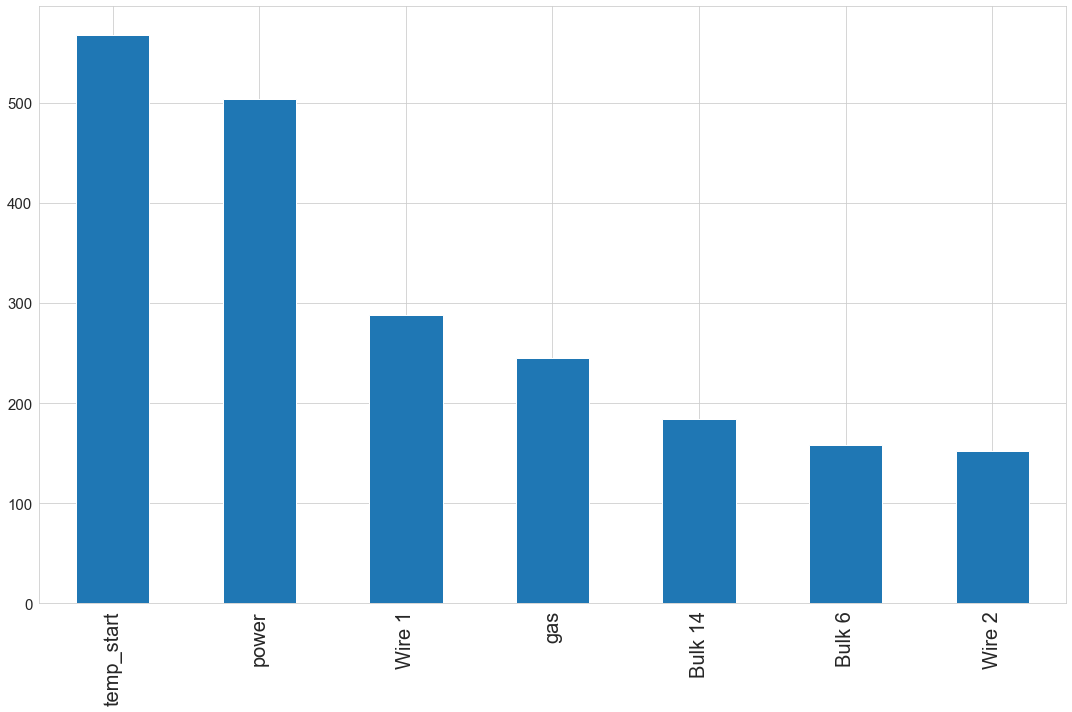

In [76]:
lgbm_model = LGBMRegressor(random_state=42,
                           boosting_type='gbdt', learning_rate=0.045,
                           max_depth=6, n_estimators=160, reg_lambda=0.35,
                           min_child_samples=2, num_leaves=19)

features_st = preprocessor.fit_transform(features_train)
lgbm_model.fit(features_st, target_train)

importances = lgbm_model.feature_importances_
lgbm_importances = pd.Series(importances, index=features_train.columns).sort_values(ascending=False).head(7)

sns.set_style("whitegrid")
fig, ax = plt.subplots()
lgbm_importances.plot.bar(ax=ax, figsize=(15, 10))
plt.xticks(size = 20)
plt.yticks(size = 15)
fig.tight_layout()

И вот первое место достаточно ожидаемо: то, что конечная температура сильно зависит от начальной - это вывод из разряда Капитана Очевидность, он напрашивается. Ожидаема и вторая мощность - а вот то, что первый провод обогнал газ, для меня, признаться, неожиданность.

Что там происходит с первым проводом и почему он так важен, пусть разбираются те, кто разбирается - но в итоге газ занимает почётное четвёртое место, а дальше идут `bulk` и `wire`.

Опытным путём было установлено, что лучший результат получается, если удалить 7 признаков с наименьшим влиянием:

In [77]:
ind = pd.Series(importances, index=features_train.columns).sort_values(ascending=False).tail(7).index
print(ind)

Index(['Bulk 5', 'Bulk 2', 'Wire 7', 'Bulk 9', 'Bulk 8', 'Wire 5', 'Wire 9'], dtype='object')


In [78]:
features_train = features_train.drop(ind, axis=1)
features_test = features_test.drop(ind, axis=1)

In [79]:
lgbm_pipeline = Pipeline(steps=[('prep', preprocessor), 
                                ('est', LGBMRegressor(random_state=42,
                                                     boosting_type='gbdt', learning_rate=0.045,
                                                     max_depth=6, n_estimators=160, reg_lambda=0.35,
                                                      min_child_samples=2, num_leaves=19))]) 

In [80]:
%%time
lgbm_pipeline.fit(features_train, target_train)

Wall time: 131 ms


Pipeline(steps=[('prep', StandardScaler()),
                ('est',
                 LGBMRegressor(learning_rate=0.045, max_depth=6,
                               min_child_samples=2, n_estimators=160,
                               num_leaves=19, random_state=42,
                               reg_lambda=0.35))])

In [81]:
%%time
predicted_test = lgbm_pipeline.predict(features_test)

Wall time: 3.99 ms


In [82]:
predicted_train = lgbm_pipeline.predict(features_train)
lgbm_mae_train = mean_absolute_error(target_train, predicted_train)
print(f'Обучающая:', lgbm_mae_train)
lgbm_mae_test = mean_absolute_error(target_test, predicted_test)
print(f'Тестовая:', lgbm_mae_test)

Обучающая: 4.105818298639707
Тестовая: 5.970887077986847


Выигрыш не то чтобы сильно велик, но хоть что-то лучше, чем ничего.
Итого `MAE ~ 5.97`